In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
image = mpl.image.imread("/content/nature.jpg")

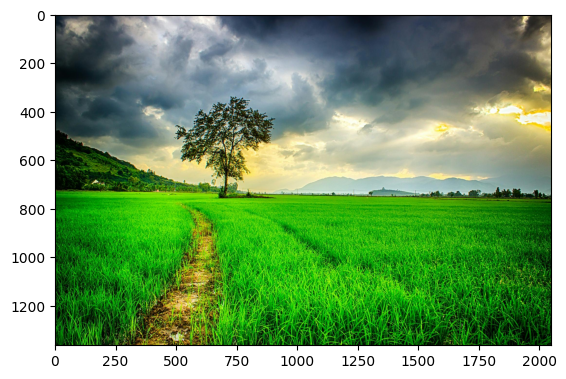

In [5]:
plt.imshow(image)

In [6]:
image.shape

(1364, 2048, 3)

In [7]:
x = image.reshape(-1,3)

In [8]:
x.shape

(2793472, 3)

In [9]:
kmeans = KMeans(n_clusters = 2)

In [10]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [11]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

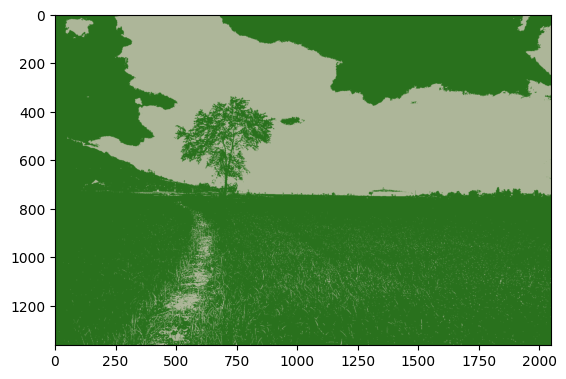

In [12]:
plt.imshow(segmented_img/255)

In [13]:
import cv2
cv2.imwrite("image1.jpg",cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite("image2.jpg",cv2.cvtColor(segmented_img.astype("uint8"), cv2.COLOR_BGR2RGB))


True

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


In [15]:
image = plt.imread("/content/nature.jpg")

In [16]:
if len(image.shape) == 3:
    image_gray = np.mean(image, axis=2)
else:
    image_gray = image


In [17]:
image_flat = image_gray.reshape((-1, 1))

In [18]:
num_clusters = 5

In [19]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(image_flat)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
segmented_image = cluster_centers[cluster_labels].reshape(image_gray.shape)

(-0.5, 2047.5, 1363.5, -0.5)

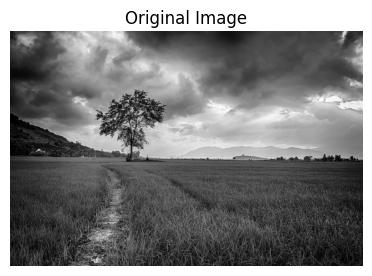

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

(-0.5, 2047.5, 1363.5, -0.5)

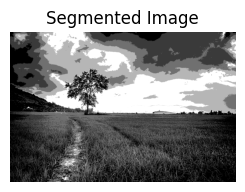

In [25]:
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

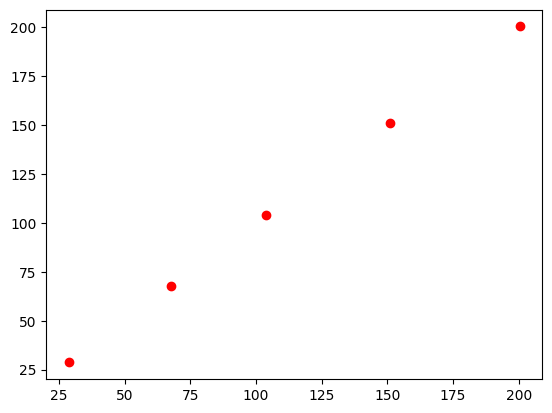

In [26]:
for center in cluster_centers:
    plt.plot(center[0], center[0], 'ro')

(0.0, 1.0, 0.0, 1.0)

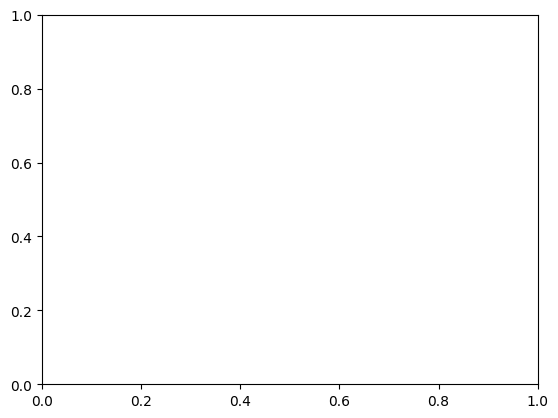

In [27]:
plt.axis('on')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


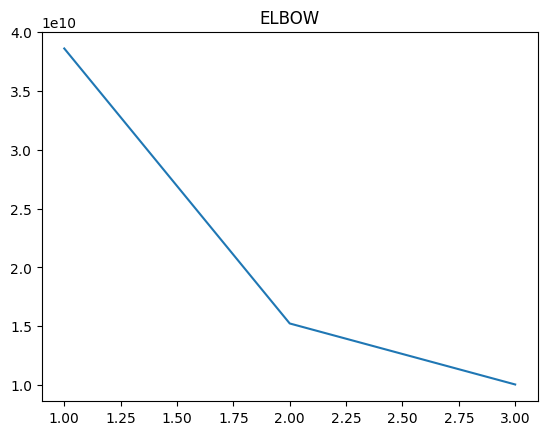

In [28]:
individual_clustering_score=[]
for i in range(1,4):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(x)
    individual_clustering_score.append(kmeans.inertia_)
plt.plot(range(1,4),individual_clustering_score)
plt.title("ELBOW")
plt.show()